<a href="https://colab.research.google.com/github/Sahlegiorgis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [92]:
# Your Work Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.
if you are using another editor, you'll use: 
 plt.show() 
at the end of all your plotting commands to have the figure pop up in another window.
'''

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.\nif you are using another editor, you'll use: \n plt.show() \nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [94]:
# Specifying the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast')
# "fast" is actually the default style, so that we don't necessarily have to set it.

In [95]:
# we can use list of available plot styles instead of "fast"
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [96]:
# Reading the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
ship = pd.read_csv(url)
print(ship.shape)
ship.head()

(712, 6)


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [97]:
# catagorizing the Pclass variables since they are catagorical.
ship['cabin_class'] = ship['Pclass'].map({1: 'first', 2:'second', 3: 'third'})
ship.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


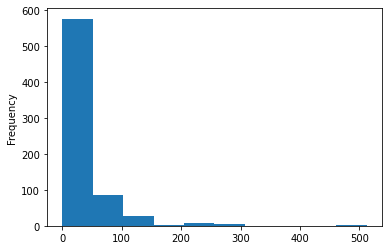

In [98]:
# we can make representative graphs based on each data set
ship['Fare'].plot(kind='hist');

In [99]:
# to avoid the outlier we need to show the min and the max data describtion.
ship['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [100]:
# romove the two extreme outliers
ship = ship[ship['Fare']< 500].copy()
ship.shape

(709, 7)

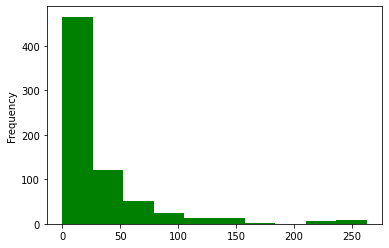

In [101]:
# show the new graph after removing the outlier
ship['Fare'].plot(kind='hist', color='green');

In [102]:
# Acontinuous variable can be converted to a catagorical variable using binning. 
# to do that we have to define the bins by taking the two extreme outliers in
# this case between 0 and 500.
farebins = [0, 8,15, 33, 500]
farelabels = ['low', 'medium', 'high', 'very_high']

In [103]:
# we use the bins. Before that we should show sorted value counts in each fare groups
ship['fare_groups'] = pd.cut(ship['Fare'], bins=farebins)
ship['fare_groups'].value_counts().sort_index()

(0, 8]       154
(8, 15]      189
(15, 33]     185
(33, 500]    174
Name: fare_groups, dtype: int64

In [104]:
# use them
ship['fare_groups'] = pd.cut(ship['Fare'], bins=farebins, labels=farelabels)
myresults = ship['fare_groups'].value_counts().sort_index()
myresults

low          154
medium       189
high         185
very_high    174
Name: fare_groups, dtype: int64

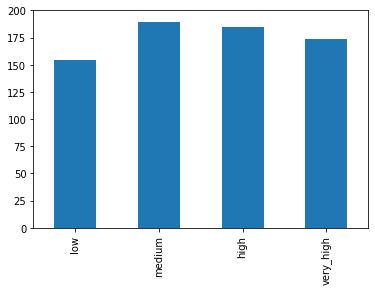

In [105]:
# Now time to plot the data graph
myresults.plot(ylim=(0, 200), kind='bar');

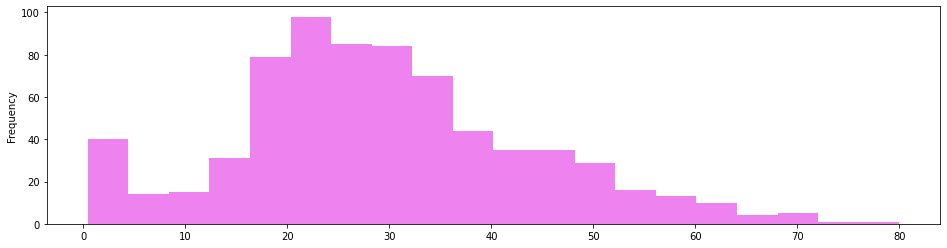

In [106]:
# display continuous variable using histogram
ship['Age'].plot(kind='hist', bins=20, figsize=(16,4), color='violet');

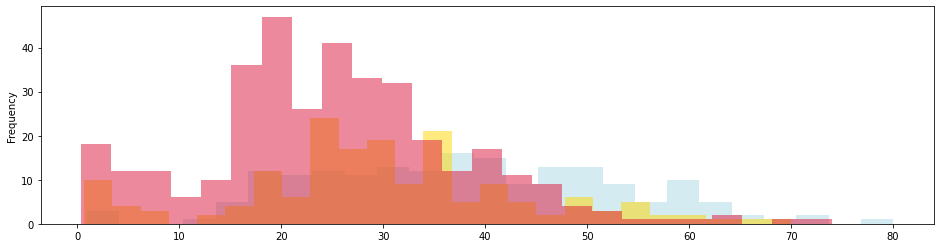

In [107]:
# stacked Histogram of continuous variable, broken out by catagorical variable
ship[ship['Pclass']==1]              ['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='lightblue', alpha=0.5)
ship[ship['Pclass']==2]              ['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='gold', alpha=0.5)
ship[ship['Pclass']==3]              ['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='crimson', alpha=0.5)     

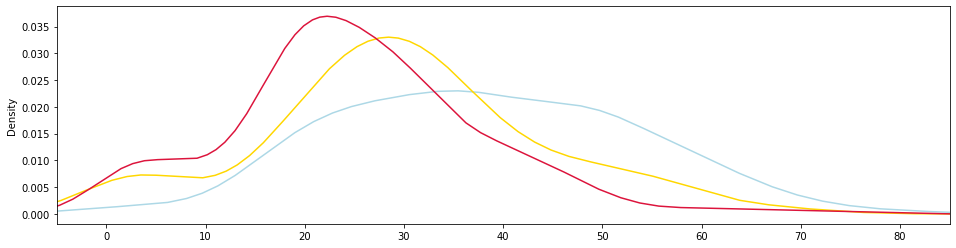

In [108]:
#Kernel and Density Estimate(KDE) can make it easier to read by using xlim
ship[ship['Pclass']==1]           ['Age'].plot(kind='density', figsize=(16, 4), color='lightblue', xlim=(-5, 85));
ship[ship['Pclass']==2]           ['Age'].plot(kind='density', figsize=(16, 4), color='gold', xlim=(-5, 85));
ship[ship['Pclass']==3]           ['Age'].plot(kind='density', figsize=(16, 4), color='crimson', xlim=(-5, 85));

In [109]:
# Displying a single catagorical variable. in this case we can show bar chart.
fare_results = ship['fare_groups'].value_counts().sort_index()
fare_results

low          154
medium       189
high         185
very_high    174
Name: fare_groups, dtype: int64

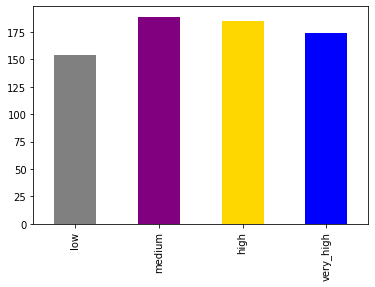

In [110]:
fare_results.plot(kind='bar', color=['gray', 'purple', 'gold', 'blue',]);

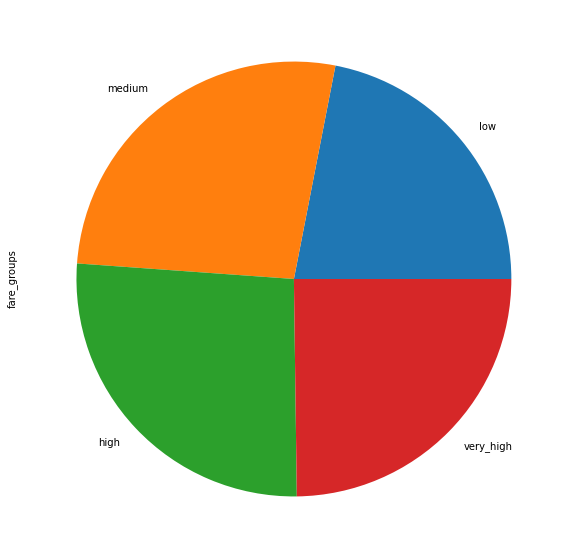

In [111]:
# Using pie chart
fare_results.plot(kind='pie', figsize=(10, 10));

In [112]:
# Comparing two catagorical variables by using  crosstab.
death_cab = pd.crosstab(ship['cabin_class'], ship['Survived'], normalize='index')
death_cab

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


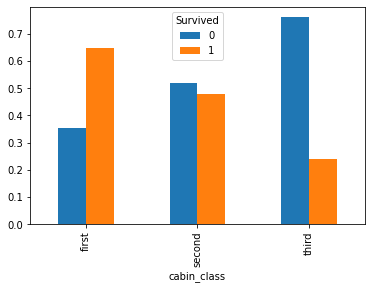

In [113]:
# plotting bar chart
death_cab.plot(kind='bar')

In [114]:
# crosstab with column percents
death_cab2 = pd.crosstab(ship['cabin_class'], ship['Survived'], normalize='columns')
death_cab2

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


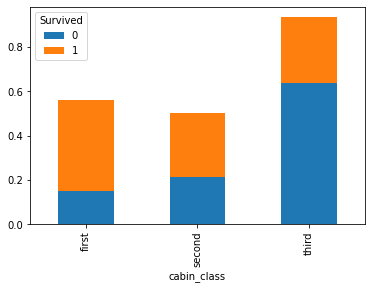

In [115]:
# make a stacked bar chart of two catagorical variable or comparison.
death_cab2.plot(kind='bar', stacked=True)

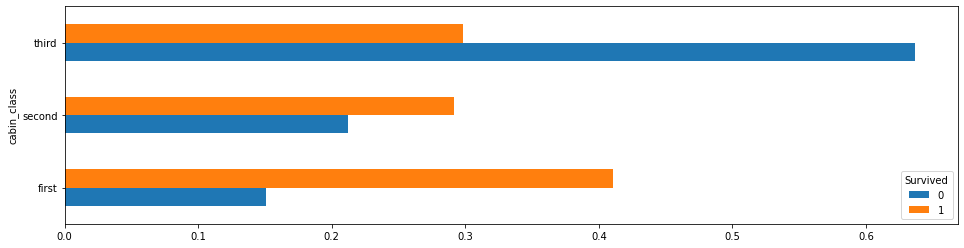

In [116]:
death_cab2.plot(kind='barh', figsize=(16,4))

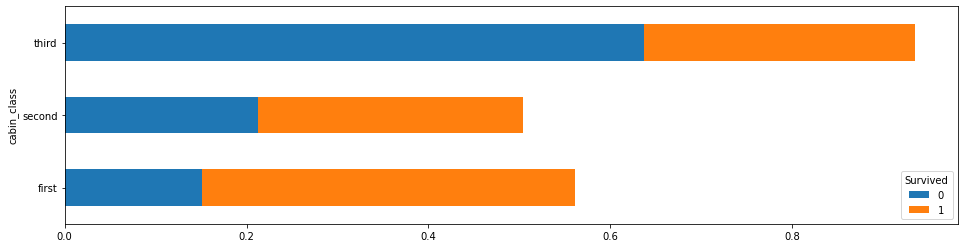

In [117]:
death_cab2.plot(kind='barh', stacked=True, figsize=(16,4))

In [118]:
# Comparing catagorical and continuous variable. Lets look at a continuous variable 'Age'.
print(ship['Age'].mean())
ship['Age'].describe()

29.618011283497882


count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [119]:

# Continuous variable broken out by a catagorical variable.
cab_age = ship.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

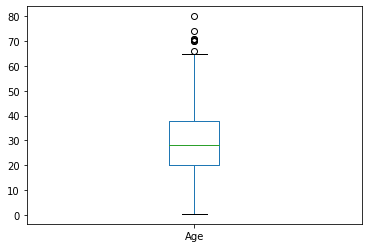

In [120]:
# visualizing a single continuous variable. wecan just use '.plot with 'kind=box'.
ship['Age'].plot(kind='box');

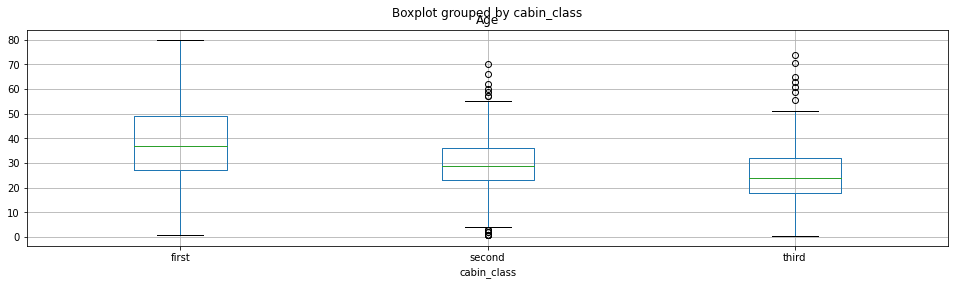

In [121]:
# to break out a continuous variable by a catagorical variable, we use '.boxplot'
ship.boxplot(column='Age', by='cabin_class', figsize=(16, 4));

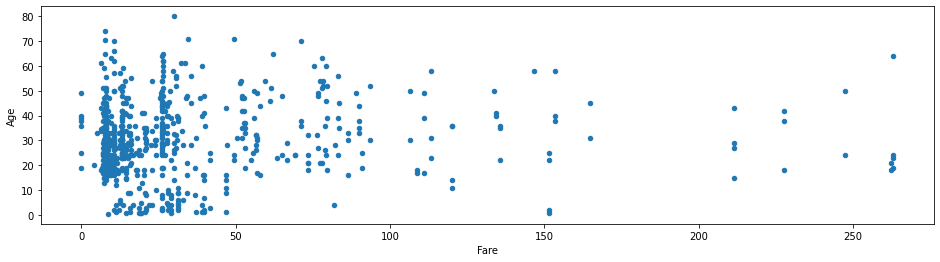

In [122]:
# comparing two or more continuous variables. in this case we can take 'Age' and 'Fare'.
ship.plot(kind='scatter', x='Fare', y='Age', figsize=(16, 4));

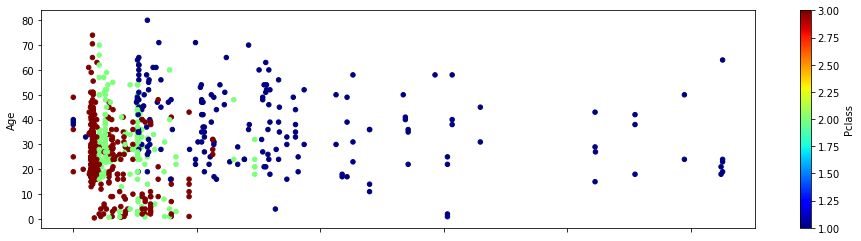

In [123]:
# Comparing three variables: 'Age', 'Fare', and 'cabin_class
ship.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='jet', figsize=(16, 4));

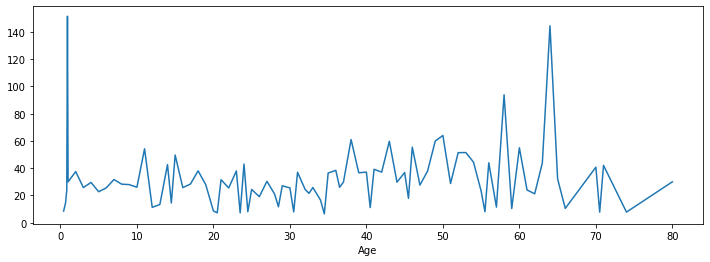

In [124]:
# plotting line chart using Age and Fare by cabin class
age_fare = ship.groupby('Age')['Fare'].mean()
age_fare.plot(figsize=(12, 4));

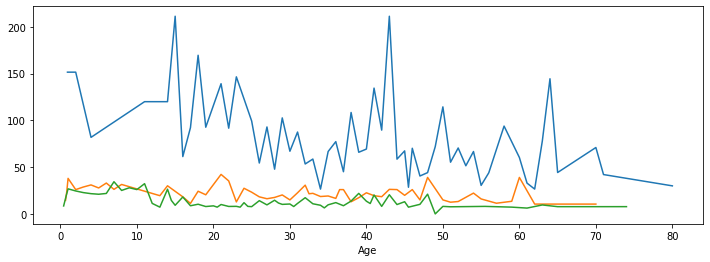

In [125]:
# now the three variables

mycolors = ['crimson', 'purple', 'dodgerblue']

# rather than specifying 3 plots we can just loop through the values.

for x in [1, 2, 3]:
  ship[ship['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12, 4));

In [126]:
# Cmparing multiple continuous variables. In this case we will see correlation Matrix
mycorr_matrix = ship.corr()
mycorr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


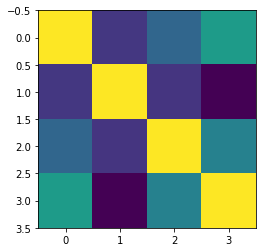

In [127]:
# Displaying the correlation matrix as a heatmap
plt.imshow(mycorr_matrix)

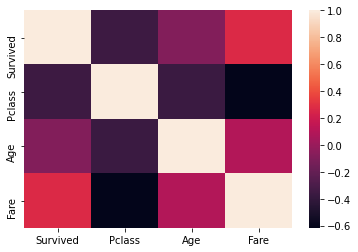

In [128]:
# By using seaborn we better easily looking the graphical representation.
sns.heatmap(mycorr_matrix);

In [129]:
# Using matplotlib

In [130]:
x = np.linspace(0, 5, 11)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [131]:
y = x**2
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

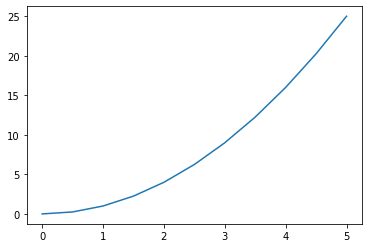

In [132]:
# now we will use basic matplotlib by using the x and y values. we don't need pandas.
plt.plot(x, y);

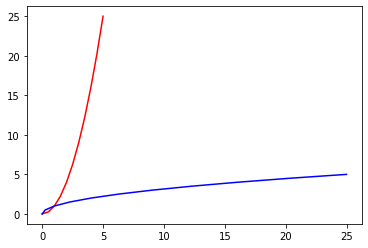

In [133]:
# We can have two plt plotstogether.
plt.plot(x, y, 'r')
plt.plot(y, x, 'b')
plt.show()

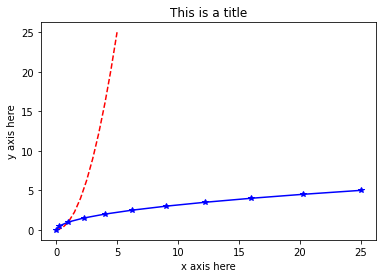

In [134]:
# we can add some labels for more depiction or clarification
plt.plot(x, y, 'r--')
plt.plot(y, x, 'b*-')
plt.xlabel('x axis here')
plt.ylabel('y axis here')
plt.title('This is a title')
plt.show()

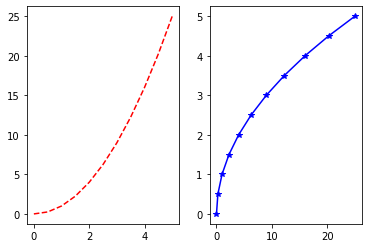

In [135]:
# Creating Multiplots on Same Canvas. The syntax is: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'b*-')
plt.show()

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

In [136]:
### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/)
url = 'https://projects.fivethirtyeight.com/nba-model/2020/latest_RAPTOR_by_team.csv'


In [137]:
data = pd.read_csv(url)
data.head

<bound method NDFrame.head of                   player_name  player_id  ...  predator_total pace_impact
0                Steven Adams  adamsst01  ...        1.948203   -0.490273
1                 Bam Adebayo  adebaba01  ...        0.689662   -0.759081
2           LaMarcus Aldridge  aldrila01  ...        0.490705   -1.350645
3    Nickeil Alexander-Walker  alexani01  ...       -3.072719    0.521904
4               Grayson Allen  allengr01  ...       -3.297816    0.492760
..                        ...        ...  ...             ...         ...
565            Thaddeus Young  youngth01  ...       -1.572771    0.686711
566                Trae Young  youngtr01  ...        3.747728    2.901481
567               Cody Zeller  zelleco01  ...       -1.749678   -0.085986
568                Ante Zizic  zizican01  ...       -4.324838   -0.606407
569               Ivica Zubac  zubaciv01  ...        2.867310   -0.395182

[570 rows x 23 columns]>

In [138]:
data.tail()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
565,Thaddeus Young,youngth01,2020,RS,CHI,3393,1591,-2.321827,0.915595,-1.406232,-4.086050,0.167176,-3.918873,-2.774142,0.793942,-1.980199,0.629077,0.629077,0,-2.783482,1.210711,-1.572771,0.686711
566,Trae Young,youngtr01,2020,RS,ATL,4645,2120,6.348706,-2.828631,3.520075,7.212579,-5.413832,1.798747,7.062610,-3.477907,3.584702,7.046723,7.046723,0,7.648326,-3.900599,3.747728,2.901481
567,Cody Zeller,zelleco01,2020,RS,CHA,2724,1341,-0.493147,-0.852428,-1.345575,-0.318751,-3.369401,-3.688153,-0.423223,-1.363005,-1.786228,0.658836,0.658836,0,-0.426274,-1.323403,-1.749678,-0.085986
568,Ante Zizic,zizican01,2020,RS,CLE,468,221,-3.788636,-0.968102,-4.756738,4.275559,-0.320781,3.954777,-2.258519,-0.716087,-2.974606,-0.025175,-0.025175,0,-2.465691,-1.859148,-4.324838,-0.606407
569,Ivica Zubac,zubaciv01,2020,RS,LAC,2441,1156,0.915180,3.713233,4.628412,0.902544,2.002883,2.905427,0.927129,3.477842,4.404971,4.203585,4.203585,0,-0.198725,3.066035,2.867310,-0.395182


In [139]:
data.columns

Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

In [140]:
data.describe

<bound method NDFrame.describe of                   player_name  player_id  ...  predator_total pace_impact
0                Steven Adams  adamsst01  ...        1.948203   -0.490273
1                 Bam Adebayo  adebaba01  ...        0.689662   -0.759081
2           LaMarcus Aldridge  aldrila01  ...        0.490705   -1.350645
3    Nickeil Alexander-Walker  alexani01  ...       -3.072719    0.521904
4               Grayson Allen  allengr01  ...       -3.297816    0.492760
..                        ...        ...  ...             ...         ...
565            Thaddeus Young  youngth01  ...       -1.572771    0.686711
566                Trae Young  youngtr01  ...        3.747728    2.901481
567               Cody Zeller  zelleco01  ...       -1.749678   -0.085986
568                Ante Zizic  zizican01  ...       -4.324838   -0.606407
569               Ivica Zubac  zubaciv01  ...        2.867310   -0.395182

[570 rows x 23 columns]>

In [141]:
data['pace_impact'].value_counts().sort_index()


-4.182920    1
-2.716978    1
-2.536679    1
-2.428995    1
-2.347312    1
            ..
 3.393765    1
 3.513369    1
 3.621883    1
 4.970897    1
 7.181521    1
Name: pace_impact, Length: 569, dtype: int64

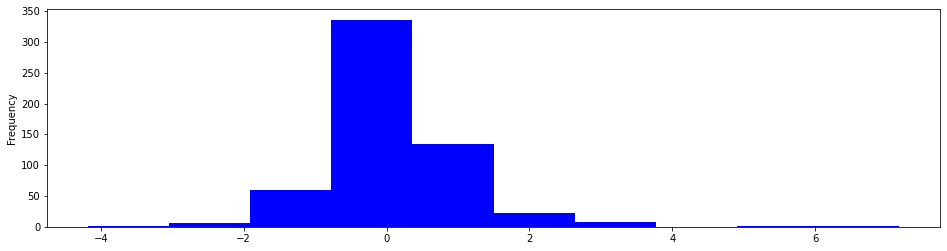

In [142]:
# displaying a single continuous variable in a histogram
data['pace_impact'].plot(kind='hist', bins=10, figsize=(16, 4), color='blue');

In [143]:
data['mp'].value_counts().sort_index()

1       3
2       1
3       1
4       3
5       4
       ..
2229    1
2231    1
2235    1
2241    2
2243    1
Name: mp, Length: 468, dtype: int64

In [144]:
impact_level = pd.crosstab(data['pace_impact'], data['team'], normalize='index')
pace_impactbins = [-5, -2, 2, 4, 7]
pace_impactlabels = ['low', 'med', 'high', 'excelent']
data['pace_impact'].head()

0   -0.490273
1   -0.759081
2   -1.350645
3    0.521904
4    0.492760
Name: pace_impact, dtype: float64

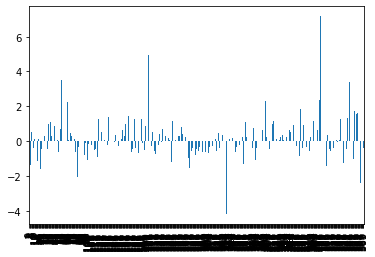

In [145]:
# Making the bar chart
data['pace_impact'].plot(kind='bar')

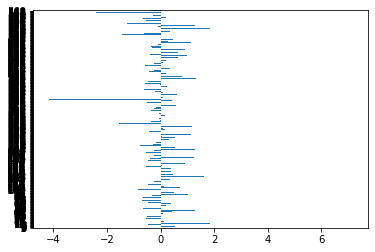

In [146]:
data['pace_impact'].plot(kind='barh')

In [147]:
# crosstab with column 
data['data1'] = pd.crosstab(data['mp'], data['pace_impact'])

ValueError: ignored

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!